In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
csv_file = "Housing.csv"
df = pd.read_csv(csv_file)

### ---------------------------- PROBLEM 1.a ---------------------------- ###
# Selecting relevant features for the baseline model
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

# Define feature matrix X and target vector y
X = df[selected_features].values
y = df[target_column].values.reshape(-1, 1)

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and evaluation sets (80%-20%)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gradient Descent Implementation
def gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.05, iterations=1000):
    m, n = X_train.shape
    weights = np.zeros((n + 1, 1))  # Initialize weights including bias term

    # Add bias term (intercept) to training data
    X_train_bias = np.c_[np.ones((m, 1)), X_train]

    train_errors = []
    val_errors = []

    for step in range(iterations):
        # Forward pass: predictions and error
        y_pred = np.dot(X_train_bias, weights)
        error = y_pred - y_train

        # Compute gradient
        gradient = (1 / m) * np.dot(X_train_bias.T, error)

        # Update weights
        weights -= learning_rate * gradient

        # Compute and record MSE for training data
        mse_train = np.mean(error**2)
        train_errors.append(mse_train)

        # Compute MSE on validation set
        X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]
        y_val_pred = np.dot(X_val_bias, weights)
        val_error = y_val_pred - y_val
        mse_val = np.mean(val_error**2)
        val_errors.append(mse_val)

    return weights, train_errors, val_errors

# Run gradient descent on the baseline model
final_weights, training_loss, validation_loss = gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.05, iterations=1000)


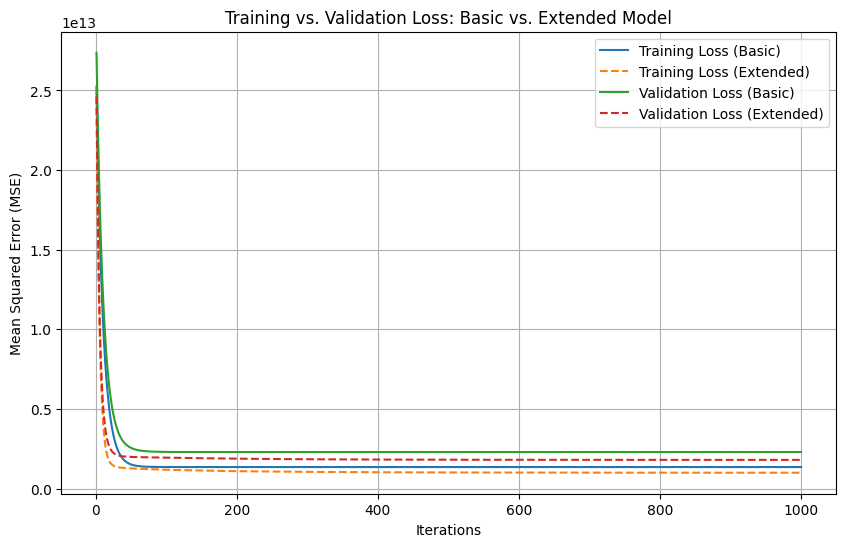

Optimal Weights for Basic Model: [4744533.74907449  669669.62933034  111527.30102236  595247.30781532
  429101.96588984  290656.73479686]

Optimal Weights for Extended Model: [3676571.48418433  507833.30198508   61207.9810817   557350.82236283
  364929.72522268  209353.59089292  498044.38832272  242595.62004985
  440619.78467125  687702.03318785  814233.75479129  624131.46501812]


In [30]:
### ---------------------------- PROBLEM 1.b ---------------------------- ###
# Selecting additional features for extended model
extended_features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
], drop_first=True)

# Adjust feature list after encoding
encoded_feature_names = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]

# Define feature matrix and target vector for extended model
X_ext = df_encoded[encoded_feature_names].values
y_ext = df_encoded[target_column].values.reshape(-1, 1)

# Ensure float type for compatibility
X_ext = X_ext.astype(float)
y_ext = y_ext.astype(float)

# Standardize numerical features only (first 5 columns)
scaler_ext = StandardScaler()
X_ext[:, :5] = scaler_ext.fit_transform(X_ext[:, :5])

# Split extended dataset into training and validation sets
X_train_ext, X_val_ext, y_train_ext, y_val_ext = train_test_split(
    X_ext, y_ext, test_size=0.2, random_state=42
)

# Run gradient descent on the extended model
weights_ext, training_loss_ext, validation_loss_ext = gradient_descent(
    X_train_ext, y_train_ext, X_val_ext, y_val_ext, learning_rate=0.05, iterations=1000
)

### ---------------------------- COMPARISON GRAPH ---------------------------- ###
# Visualize training and validation losses for both models
plt.figure(figsize=(10, 6))

# Training loss plots
plt.plot(range(1, 1001), training_loss, label="Training Loss (Basic)")
plt.plot(range(1, 1001), training_loss_ext, label="Training Loss (Extended)", linestyle="--")

# Validation loss plots
plt.plot(range(1, 1001), validation_loss, label="Validation Loss (Basic)")
plt.plot(range(1, 1001), validation_loss_ext, label="Validation Loss (Extended)", linestyle="--")

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs. Validation Loss: Basic vs. Extended Model")
plt.legend()
plt.grid(True)
plt.show()

### ---------------------------- DISPLAY BEST PARAMETERS ---------------------------- ###
print("Optimal Weights for Basic Model:", final_weights.ravel())
print("\nOptimal Weights for Extended Model:", weights_ext.ravel())

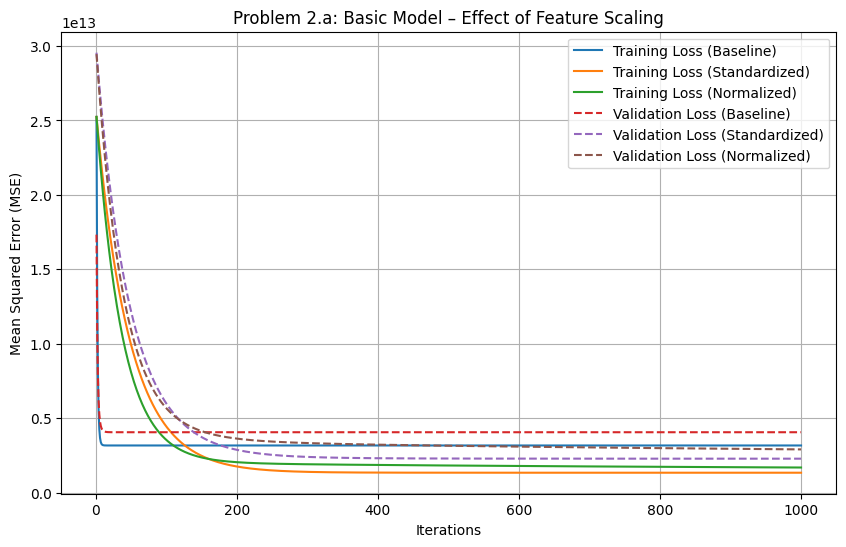

Optimal Weights (Baseline - Basic): [  4.01448962 837.91817466  14.62444416   7.79441183  12.13908431
   3.13261148]
Optimal Weights (Standardized - Basic): [4706324.19866291  679784.16108007  113853.85524508  564996.83769347
  423850.53400103  288572.51539751]
Optimal Weights (Normalized - Basic): [3003436.32770682 1594381.78836447 1471384.436388   1121038.15840208
 1433551.94486797 1336236.55962768]


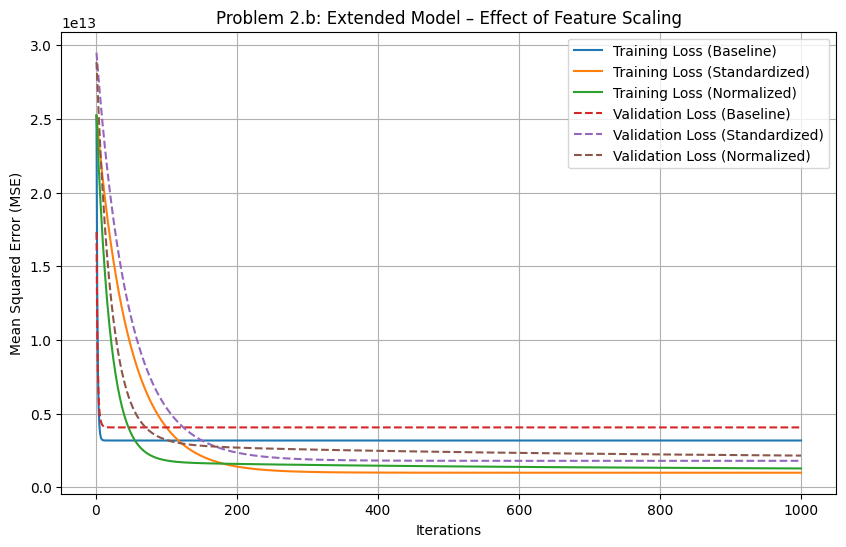

Optimal Weights (Baseline - Extended): [4.01448681e+00 8.37917199e+02 1.46244351e+01 7.79440799e+00
 1.21390782e+01 3.13260981e+00 3.43727661e+00 1.25826965e+00
 2.81834376e+00 5.09686635e-01 3.21974528e+00 1.55078495e+00]
Optimal Weights (Standardized - Extended): [4706324.19866291  522087.04752932   60657.90506096  528889.87497578
  363380.87926715  211389.44518885  145047.7854994    94723.52054041
  206441.94710708  156143.91037252  373875.28580191  269574.36203818]
Optimal Weights (Normalized - Extended): [1861854.43429587 1047716.9445988  1025451.45062143  959866.17993833
 1097073.55735408  899593.3259709  1064537.68543662  382870.51832834
  444662.62244918  388291.07547095 1030076.98483069  582915.49369803]


In [31]:
### ---------------------------- PROBLEM 2.a ---------------------------- ###
from sklearn.preprocessing import MinMaxScaler

# Define basic model features and target column
basic_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

# Extract X and y from dataset
X_basic = df[basic_features].values
y_basic = df[target_column].values.reshape(-1, 1)

# Split dataset into training and evaluation sets
X_train, X_val, y_train, y_val = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)

# Gradient Descent Function
def gradient_descent(X, y, X_val, y_val, learning_rate, iterations=1000):
    m, n = X.shape
    weights = np.zeros((n + 1, 1))
    X_bias = np.c_[np.ones((m, 1)), X]
    train_errors = []
    val_errors = []

    for _ in range(iterations):
        y_pred = np.dot(X_bias, weights)
        error = y_pred - y
        gradient = (1 / m) * np.dot(X_bias.T, error)
        weights -= learning_rate * gradient
        train_mse = np.mean(error**2)
        train_errors.append(train_mse)

        X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]
        y_val_pred = np.dot(X_val_bias, weights)
        val_error = y_val_pred - y_val
        val_mse = np.mean(val_error**2)
        val_errors.append(val_mse)

    return weights, train_errors, val_errors

# -------- Baseline: No Scaling --------
weights_base, loss_train_base, loss_val_base = gradient_descent(
    X_train, y_train, X_val, y_val, learning_rate=1e-8, iterations=1000
)

# -------- Standardization --------
scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_val_std = scaler_standard.transform(X_val)
weights_std, loss_train_std, loss_val_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, learning_rate=0.01, iterations=1000
)

# -------- Normalization --------
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_val_norm = scaler_minmax.transform(X_val)
weights_norm, loss_train_norm, loss_val_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, learning_rate=0.01, iterations=1000
)

# -------- Plotting Training and Validation Losses --------
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_train_base, label="Training Loss (Baseline)")
plt.plot(range(1, 1001), loss_train_std, label="Training Loss (Standardized)")
plt.plot(range(1, 1001), loss_train_norm, label="Training Loss (Normalized)")
plt.plot(range(1, 1001), loss_val_base, linestyle="--", label="Validation Loss (Baseline)")
plt.plot(range(1, 1001), loss_val_std, linestyle="--", label="Validation Loss (Standardized)")
plt.plot(range(1, 1001), loss_val_norm, linestyle="--", label="Validation Loss (Normalized)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Problem 2.a: Basic Model – Effect of Feature Scaling")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Weights (Baseline - Basic):", weights_base.ravel())
print("Optimal Weights (Standardized - Basic):", weights_std.ravel())
print("Optimal Weights (Normalized - Basic):", weights_norm.ravel())


### ---------------------------- PROBLEM 2.b ---------------------------- ###
# Define extended feature set for the model
extended_features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
], drop_first=True)

# Feature names after encoding
encoded_features_ext = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]

# Prepare feature matrix and target vector
X_ext = df_encoded[encoded_features_ext].values.astype(float)
y_ext = df_encoded[target_column].values.reshape(-1, 1).astype(float)

# Train-validation split
X_train_ext, X_val_ext, y_train_ext, y_val_ext = train_test_split(
    X_ext, y_ext, test_size=0.2, random_state=42
)

# -------- Baseline: No Scaling --------
weights_base_ext, loss_train_base_ext, loss_val_base_ext = gradient_descent(
    X_train_ext, y_train_ext, X_val_ext, y_val_ext, learning_rate=1e-8, iterations=1000
)

# -------- Standardization --------
scaler_std_ext = StandardScaler()
X_train_std_ext = scaler_std_ext.fit_transform(X_train_ext)
X_val_std_ext = scaler_std_ext.transform(X_val_ext)
weights_std_ext, loss_train_std_ext, loss_val_std_ext = gradient_descent(
    X_train_std_ext, y_train_ext, X_val_std_ext, y_val_ext, learning_rate=0.01, iterations=1000
)

# -------- Normalization --------
scaler_norm_ext = MinMaxScaler()
X_train_norm_ext = scaler_norm_ext.fit_transform(X_train_ext)
X_val_norm_ext = scaler_norm_ext.transform(X_val_ext)
weights_norm_ext, loss_train_norm_ext, loss_val_norm_ext = gradient_descent(
    X_train_norm_ext, y_train_ext, X_val_norm_ext, y_val_ext, learning_rate=0.01, iterations=1000
)

# -------- Plotting Training and Validation Losses --------
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_train_base_ext, label="Training Loss (Baseline)")
plt.plot(range(1, 1001), loss_train_std_ext, label="Training Loss (Standardized)")
plt.plot(range(1, 1001), loss_train_norm_ext, label="Training Loss (Normalized)")
plt.plot(range(1, 1001), loss_val_base_ext, linestyle="--", label="Validation Loss (Baseline)")
plt.plot(range(1, 1001), loss_val_std_ext, linestyle="--", label="Validation Loss (Standardized)")
plt.plot(range(1, 1001), loss_val_norm_ext, linestyle="--", label="Validation Loss (Normalized)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Problem 2.b: Extended Model – Effect of Feature Scaling")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Weights (Baseline - Extended):", weights_base_ext.ravel())
print("Optimal Weights (Standardized - Extended):", weights_std_ext.ravel())
print("Optimal Weights (Normalized - Extended):", weights_norm_ext.ravel())


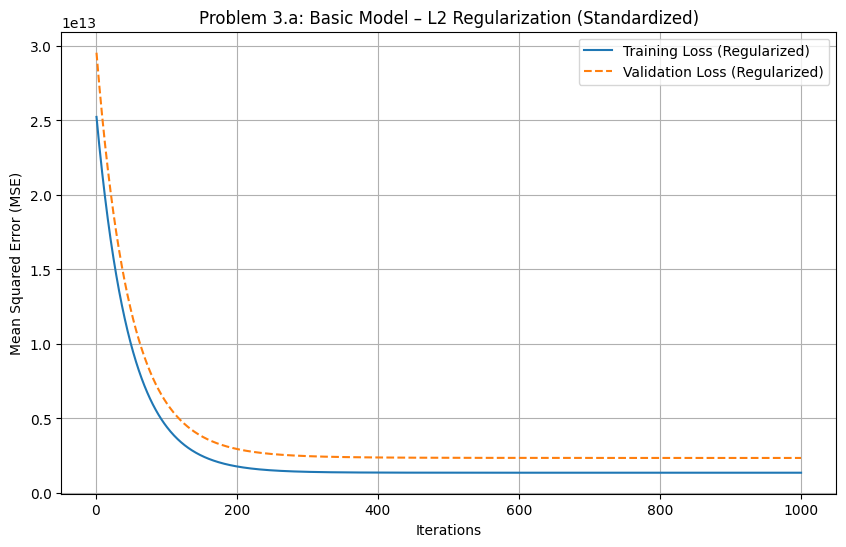

Optimal Weights (Basic, Regularized): [4706324.19866291  625314.79031653  137323.3589828   525170.1901353
  391954.13026882  284434.23031367]


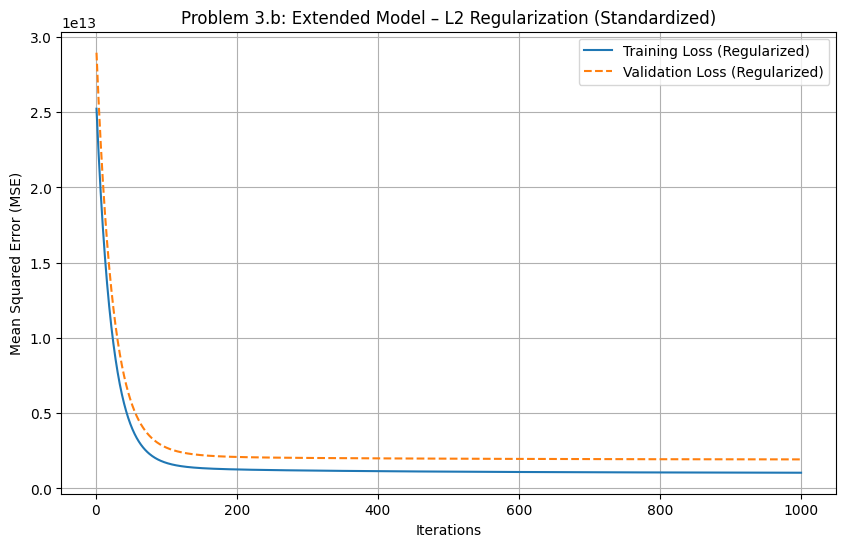

Optimal Weights (Extended, Regularized): [3374834.44449859  459031.67969867  109555.52834539  497819.49659828
  331053.40308523  207204.5053926   874876.64152065  244428.23022984
  431000.74729707  231417.32890368  644520.74396718  435997.98116178]


In [32]:
### ---------------------------- PROBLEM 3.a ---------------------------- ###
# Define basic model features and target column
basic_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

# Extract feature matrix and target vector
X_basic = df[basic_features].values
y_basic = df[target_column].values.reshape(-1, 1)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)

# Standardize numeric features (based on 2.a)
scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_val_std = scaler_standard.transform(X_val)

# -------- Regularized Gradient Descent Function (L2 Penalty) --------
def gradient_descent_reg(X, y, X_val, y_val, learning_rate=0.01, iterations=1000, lambda_penalty=0.1):
    m, n = X.shape
    weights = np.zeros((n + 1, 1))
    X_bias = np.c_[np.ones((m, 1)), X]
    loss_train = []
    loss_val = []

    for _ in range(iterations):
        y_pred = np.dot(X_bias, weights)
        error = y_pred - y
        grad = (1 / m) * np.dot(X_bias.T, error)
        grad[1:] += lambda_penalty * weights[1:]
        weights -= learning_rate * grad

        loss_train.append(np.mean(error**2))
        X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]
        y_val_pred = np.dot(X_val_bias, weights)
        val_error = y_val_pred - y_val
        loss_val.append(np.mean(val_error**2))

    return weights, loss_train, loss_val

# Run regularized training on standardized data
weights_reg, loss_train_reg, loss_val_reg = gradient_descent_reg(
    X_train_std, y_train, X_val_std, y_val, learning_rate=0.01, iterations=1000, lambda_penalty=0.1
)

# -------- Plotting Losses --------
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_train_reg, label="Training Loss (Regularized)")
plt.plot(range(1, 1001), loss_val_reg, linestyle="--", label="Validation Loss (Regularized)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Problem 3.a: Basic Model – L2 Regularization (Standardized)")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Weights (Basic, Regularized):", weights_reg.ravel())


### ---------------------------- PROBLEM 3.b ---------------------------- ###
# Extended feature list (including categorical variables)
extended_features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
], drop_first=True)

# Encoded feature list
encoded_features_ext = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad_yes', 'guestroom_yes', 'basement_yes',
    'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'
]

# Extract features and target
X_ext = df_encoded[encoded_features_ext].values.astype(float)
y_ext = df_encoded[target_column].values.reshape(-1, 1).astype(float)

# Train-validation split
X_train_ext, X_val_ext, y_train_ext, y_val_ext = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)

# Standardize only numerical columns (assume first 5)
scaler_std_ext = StandardScaler()
X_train_std_ext = X_train_ext.copy()
X_val_std_ext = X_val_ext.copy()
X_train_std_ext[:, :5] = scaler_std_ext.fit_transform(X_train_ext[:, :5])
X_val_std_ext[:, :5] = scaler_std_ext.transform(X_val_ext[:, :5])

# Run regularized training on extended model
weights_reg_ext, loss_train_reg_ext, loss_val_reg_ext = gradient_descent_reg(
    X_train_std_ext, y_train_ext, X_val_std_ext, y_val_ext,
    learning_rate=0.01, iterations=1000, lambda_penalty=0.1
)

# -------- Plotting Losses --------
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_train_reg_ext, label="Training Loss (Regularized)")
plt.plot(range(1, 1001), loss_val_reg_ext, linestyle="--", label="Validation Loss (Regularized)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Problem 3.b: Extended Model – L2 Regularization (Standardized)")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Weights (Extended, Regularized):", weights_reg_ext.ravel())
